In [8]:
"""Notebook used as a POC for the project."""
# pylint: disable=import-error

import os

import pandas as pd
import librosa as lr
import matplotlib.pyplot as plt

from scipy.io.wavfile import write

In [2]:
DATASET_DIR = "../data"

file_infos = []

files = [
    os.path.join(dp, f)
    for dp, dn, filenames in os.walk(DATASET_DIR)
    for f in filenames
    if os.path.splitext(f)[1] == ".WAV"
]

for file in files:
    file_info = {}
    file_info["class"] = file.split("/")[-2]
    audio, sr = lr.load(file)
    file_info["sample_rate"] = sr
    file_info["length"] = lr.get_duration(y=audio, sr=sr)
    file_info["name"] = file
    file_infos.append(file_info)

file_infos = pd.DataFrame(file_infos)

In [3]:
file_infos.describe()

,sample_rate,length
count,419.0,419.000000
mean,22050.0,4.552862
std,0.0,2.486746
min,22050.0,0.966485
25%,22050.0,3.129569
50%,22050.0,4.096009
75%,22050.0,5.108526
max,22050.0,24.990204


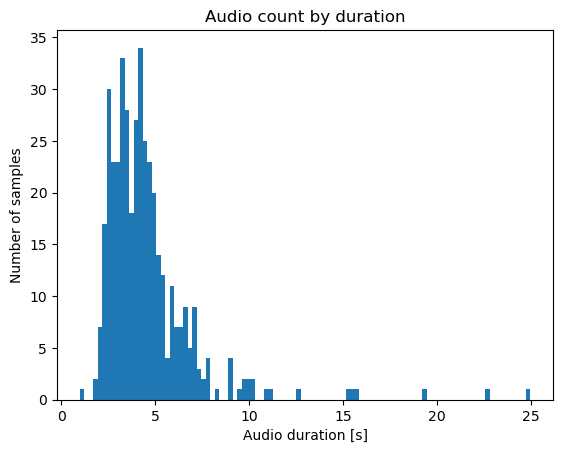

In [4]:
file_infos["length"].hist(bins=100, grid=False)
plt.title("Audio count by duration")
plt.xlabel("Audio duration [s]")
plt.ylabel("Number of samples")
plt.show()

In [24]:
# pylint: disable=invalid-name
audio_file_number = 1
for file in files:
    # load audio data
    audio, sr = lr.load(file)
    # calculate audio length
    audio_duration = len(audio) / sr
    # create name for segment
    segment_name = file.split("/")
    segment_name[1] = "new_data"
    # make sure segment is of proper length
    if 1 <= audio_duration <= 8:
        # calculate how many segments can be in the audio sample and the offset
        segments_num = len(audio) // sr
        offset = len(audio) - (segments_num * sr)
        start = offset // 2
        # create segments
        for seg_num in range(segments_num):
            # calculate segment start and end
            segment_start = start + seg_num * sr
            segment_end = start + (seg_num + 1) * sr
            # cut audio
            segment = audio[segment_start:segment_end]
            # save audio
            segment_name[-1] = f"audio{audio_file_number}.wav"
            os.makedirs("/".join(segment_name[:-1]), exist_ok=True)
            write("/".join(segment_name), sr, segment)
            audio_file_number += 1